In [3]:
%matplotlib inline

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from warnings import filterwarnings
filterwarnings('ignore')


In [4]:
submission = pd.read_csv('submission_format.csv')

In [5]:
train = pd.read_csv("dengue_features_train.csv")

In [6]:
test = pd.read_csv("dengue_features_test.csv")

In [7]:
label = pd.read_csv("dengue_labels_train.csv")

In [8]:
# Data exploratory
print("Train set missing values (%):\n",train.isna().sum()/len(train)*100)

Train set missing values (%):
 city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
ndvi_se                                   1.510989
ndvi_sw                                   1.510989
precipitation_amt_mm                      0.892857
reanalysis_air_temp_k                     0.686813
reanalysis_avg_temp_k                     0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_sat_precip_amt_mm              0.892857
reanalysis_specific_humidity_g_per_kg     0.686813
reanalysis_tdtr_k                         0.686813


In [9]:
print("Test set missing values (%):\n",test.isna().sum()/len(test)*100)

Test set missing values (%):
 city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  10.336538
ndvi_nw                                   2.644231
ndvi_se                                   0.240385
ndvi_sw                                   0.240385
precipitation_amt_mm                      0.480769
reanalysis_air_temp_k                     0.480769
reanalysis_avg_temp_k                     0.480769
reanalysis_dew_point_temp_k               0.480769
reanalysis_max_air_temp_k                 0.480769
reanalysis_min_air_temp_k                 0.480769
reanalysis_precip_amt_kg_per_m2           0.480769
reanalysis_relative_humidity_percent      0.480769
reanalysis_sat_precip_amt_mm              0.480769
reanalysis_specific_humidity_g_per_kg     0.480769
reanalysis_tdtr_k                         0.480769
s

In [10]:
print("Train set duplicates:",train.duplicated().sum())
print("Test set duplicates :", test.duplicated().sum())

Train set duplicates: 0
Test set duplicates : 0


In [11]:
train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [12]:
# Fusion of train and label

data = pd.merge(train, label, how = 'left', on = ["city", 'year', 'weekofyear'])
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [13]:
# We won't use this information in the finale report, we delete the column.
data = data.drop("week_start_date", axis = 1)

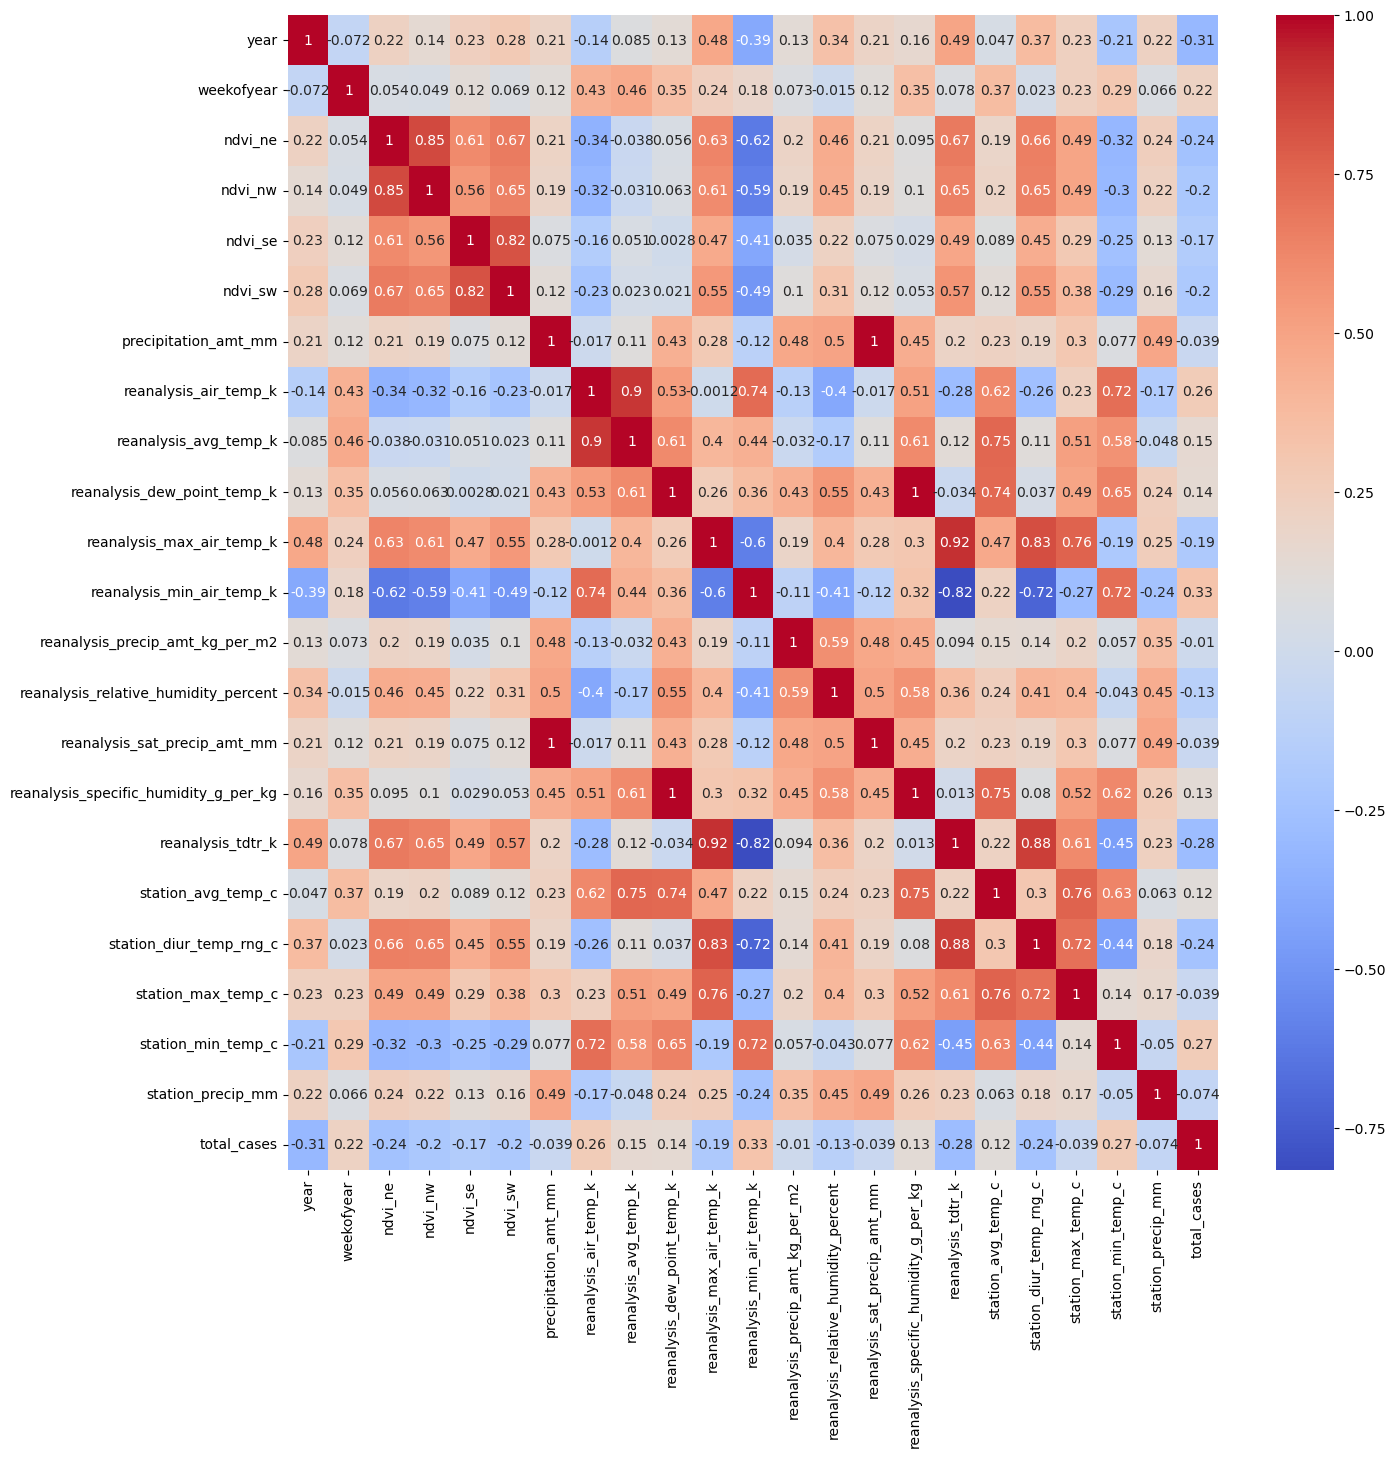

In [14]:
# Data heatmap

data_num = data.select_dtypes(include =["int64", "float64"])
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_num.corr(), annot = True, ax = ax, cmap = 'coolwarm');

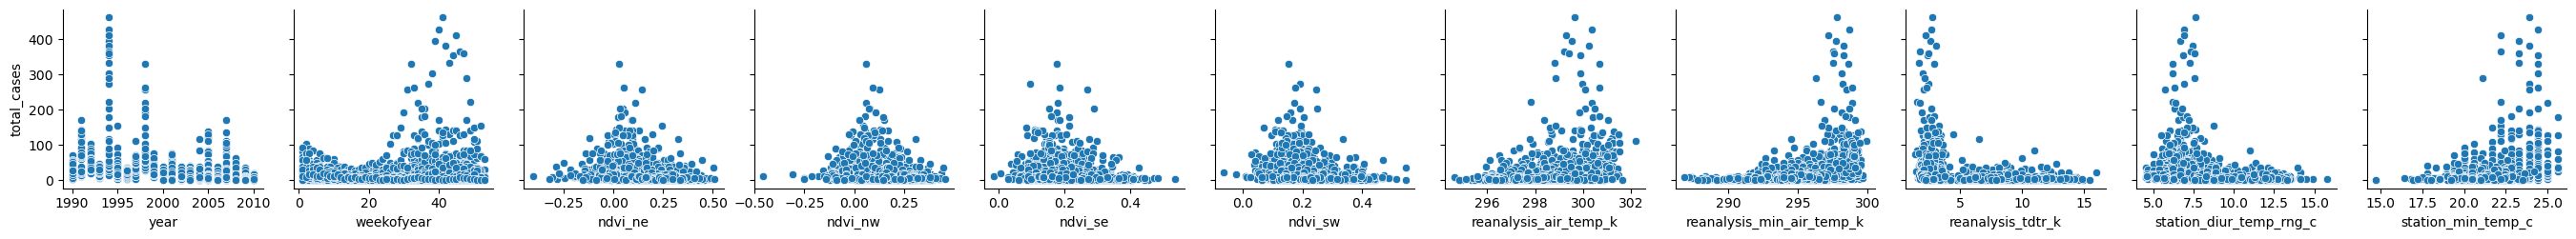

In [15]:
# Pairplot with the most correlated variables according to the heatmap
pp = sns.pairplot(data=data,
                  y_vars=['total_cases'],
                  x_vars=['year', 'weekofyear', 'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k',
                         'reanalysis_min_air_temp_k','reanalysis_tdtr_k','station_diur_temp_rng_c',
                         'station_min_temp_c']);

In [16]:
data_sj = data.loc[data['city'] == "sj"]

In [17]:
data_iq = data.loc[data['city'] == "iq"]

In [18]:
target_sj = data_sj.total_cases
feat_sj = data_sj.drop(["total_cases","city"], axis = 1)

target_iq = data_iq.total_cases
feat_iq = data_iq.drop(["total_cases","city"], axis = 1)


In [19]:
feat_sj.info()
feat_sj.head()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 0 to 935
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   936 non-null    int64  
 1   weekofyear                             936 non-null    int64  
 2   ndvi_ne                                745 non-null    float64
 3   ndvi_nw                                887 non-null    float64
 4   ndvi_se                                917 non-null    float64
 5   ndvi_sw                                917 non-null    float64
 6   precipitation_amt_mm                   927 non-null    float64
 7   reanalysis_air_temp_k                  930 non-null    float64
 8   reanalysis_avg_temp_k                  930 non-null    float64
 9   reanalysis_dew_point_temp_k            930 non-null    float64
 10  reanalysis_max_air_temp_k              930 non-null    float64
 11  reanalysis_

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [20]:
X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(feat_sj, target_sj, test_size = 0.2, random_state = 42)

In [21]:
X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(feat_iq, target_iq, test_size = 0.2, random_state = 42)

In [22]:
# Coding of date type variables - weekofyear
import datetime as dt
X_train_sj['weekofyear']=pd.to_datetime(X_train_sj['weekofyear']).map(dt.datetime.toordinal)

X_test_sj['weekofyear']=pd.to_datetime(X_test_sj['weekofyear']).map(dt.datetime.toordinal)

X_train_iq['weekofyear']=pd.to_datetime(X_train_iq['weekofyear']).map(dt.datetime.toordinal)

X_test_iq['weekofyear']=pd.to_datetime(X_test_iq['weekofyear']).map(dt.datetime.toordinal)

# Coding of year variable
X_train_sj['year']=pd.to_datetime(X_train_sj['year']).map(dt.datetime.toordinal)

X_test_sj['year']=pd.to_datetime(X_test_sj['year']).map(dt.datetime.toordinal)

X_train_iq['year']=pd.to_datetime(X_train_iq['year']).map(dt.datetime.toordinal)

X_test_iq['year']=pd.to_datetime(X_test_iq['year']).map(dt.datetime.toordinal)


In [23]:
# Missing values treatment
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_sj =imputer.fit_transform(X_train_sj)
X_test_sj = imputer.transform(X_test_sj)
X_train_iq = imputer.fit_transform(X_train_iq)
X_test_iq = imputer.transform(X_test_iq)

In [24]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()

In [25]:
reglin.fit(X_train_sj, y_train_sj)
reglin.fit(X_train_iq, y_train_iq)

LinearRegression()

In [26]:
# Score R2 of the models

print("Train San Juan coefficient :", reglin.score(X_train_sj, y_train_sj))
print("Test San Juan coefficient :", reglin.score(X_test_sj, y_test_sj))

print("Train Iquitos coefficient :", reglin.score(X_train_iq, y_train_iq))
print("Test Iquitos coefficient :", reglin.score(X_test_iq, y_test_iq))

Train San Juan coefficient : -0.14734579740560383
Test San Juan coefficient : -0.1356032929748323
Train Iquitos coefficient : 0.09766557847298407
Test Iquitos coefficient : -0.028598099786232956


In [27]:
# San Juan - Poisson model 

pois = linear_model.PoissonRegressor()

pois.fit(X_train_sj, y_train_sj)

print("Train San Juan poisson score:", pois.score(X_train_sj, y_train_sj))
print("Test San Juan poisson score:", pois.score(X_test_sj, y_test_sj))

Train San Juan poisson score: 0.10105738571915868
Test San Juan poisson score: 0.049901881896725286


In [28]:
# Iquitos - Poisson model 

pois = linear_model.PoissonRegressor()

pois.fit(X_train_iq, y_train_iq)

print("Train Iquitos poisson score:", pois.score(X_train_iq, y_train_iq))
print("Test Iquitos poisson score:", pois.score(X_test_iq, y_test_iq))

Train Iquitos poisson score: 0.06279859261956866
Test Iquitos poisson score: 0.05881890924818245


In [29]:
# San Juan - Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_sj, y_train_sj)
print("Train San Juan decision tree score:",regressor.score(X_train_sj, y_train_sj))
print("Test San Juan decision tree score:", regressor.score(X_test_sj, y_test_sj))

Train San Juan decision tree score: 0.9993939878660886
Test San Juan decision tree score: -1.4975997041034583


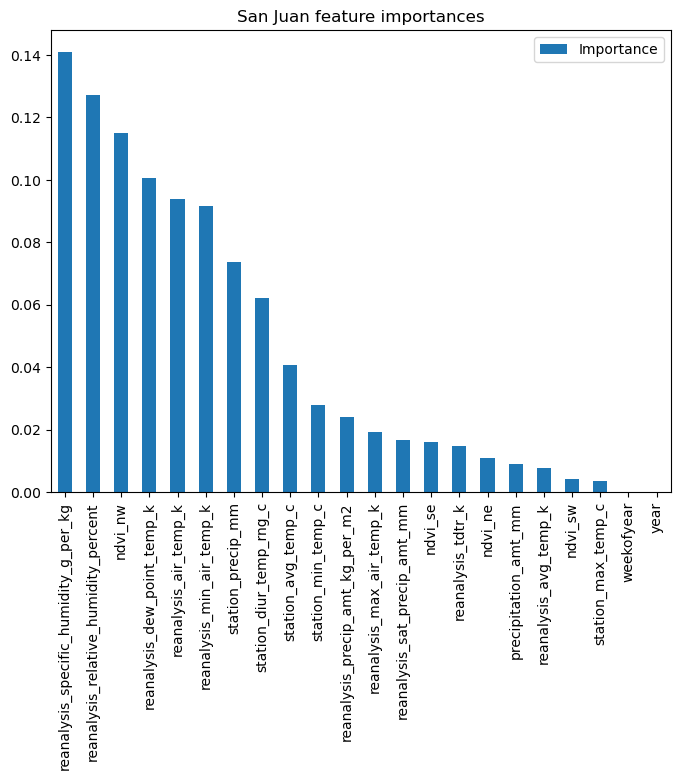

In [30]:
feat_imp = pd.DataFrame(regressor.feature_importances_, index = feat_sj.columns, columns = ['Importance'])

feat_imp.sort_values(by = 'Importance', ascending = False, inplace = True)
feat_imp.plot(kind='bar', figsize=(8,6))
plt.title('San Juan feature importances')
plt.show()

In [31]:
# San Juan - New modelling with correlated values and the 7 most important features

feat_new_sj = feat_sj[
    ['year', 'weekofyear', 'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k',
     'reanalysis_min_air_temp_k','reanalysis_tdtr_k','station_diur_temp_rng_c','station_min_temp_c',
     "reanalysis_dew_point_temp_k", "reanalysis_specific_humidity_g_per_kg","station_precip_mm", 
    "reanalysis_relative_humidity_percent", "reanalysis_avg_temp_k"]]

 

X_train_new_sj, X_test_new_sj, y_train_sj, y_test_sj = train_test_split(feat_new_sj, target_sj, test_size = 0.2, random_state = 42)

In [32]:
col = ['year', 'weekofyear', 'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k',
     'reanalysis_min_air_temp_k','reanalysis_tdtr_k','station_diur_temp_rng_c','station_min_temp_c',
     "reanalysis_dew_point_temp_k", "reanalysis_specific_humidity_g_per_kg","station_precip_mm", 
    "reanalysis_relative_humidity_percent", "reanalysis_avg_temp_k"]



In [33]:
X_train_new_sj = X_train_new_sj.drop(["year", "weekofyear"], axis = 1)


In [34]:
# Storage of year and weekofyear columns

sj_year = X_test_new_sj[["year",'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k']]
sj_weekofyear = X_test_new_sj[["weekofyear",'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k']]
df_yw = sj_year.merge(sj_weekofyear, left_on=['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k'],
                     right_on = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k'])

df_yw.head()

,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,weekofyear
0,1996,NaN,0.073750,0.221783,0.183433,299.581429,27
1,1991,0.10805,0.091675,0.139800,0.162414,300.105714,36
2,1994,0.06520,0.081750,0.164414,0.132143,298.927143,18
3,2002,-0.17430,-0.072300,0.199300,0.171300,299.892857,50
4,2003,-0.08530,0.025750,0.208386,0.208557,300.355714,27


In [35]:
X_test_new_sj = X_test_new_sj.drop(["year", "weekofyear"], axis = 1)

In [36]:
# Encoding

X_train_new_sj = imputer.fit_transform(X_train_new_sj)
X_test_new_sj = imputer.transform(X_test_new_sj)


In [37]:
# LinearRegression model to look for linear relations
reglin.fit(X_train_new_sj, y_train_sj)

LinearRegression()

In [38]:
# Models comparison

regressor.fit(X_train_new_sj, y_train_sj)
pois.fit(X_train_new_sj, y_train_sj)

PoissonRegressor()

In [39]:
print("Train reg score :", reglin.score(X_train_new_sj, y_train_sj))
print("Test reg score :", reglin.score(X_test_new_sj, y_test_sj))

print("Train decision tree score :", regressor.score(X_train_new_sj, y_train_sj))
print("Test decision tree score :", regressor.score(X_test_new_sj, y_test_sj))

print("Train poisson score:", pois.score(X_train_new_sj, y_train_sj))
print("Test poisson score:", pois.score(X_test_new_sj, y_test_sj))

Train reg score : 0.06105777235861898
Test reg score : 0.06915612089864243
Train decision tree score : 0.9993939878660886
Test decision tree score : -2.008612115125495
Train poisson score: 0.09907117717190006
Test poisson score: 0.10778238419841568


In [40]:
# Display of MAE, MSE and RMSE metrics
pred_reg = reglin.predict(X_test_new_sj)
pred_train_reg = reglin.predict (X_train_new_sj)

mae_reg = mean_absolute_error(y_test_sj, pred_reg)
mae_train_reg = mean_absolute_error(y_train_sj, pred_train_reg)

mse_reg = mean_squared_error(y_test_sj, pred_reg)
mse_train_reg = mean_squared_error(y_train_sj, pred_train_reg)

rmse_reg = mean_squared_error(y_test_sj, pred_reg, squared = False)
rmse_train_reg = mean_squared_error(y_train_sj, pred_train_reg, squared = False)


pred_regressor = regressor.predict(X_test_new_sj)
pred_train_regressor = regressor.predict (X_train_new_sj)

mae_regressor = mean_absolute_error(y_test_sj, pred_regressor)
mae_train_regressor = mean_absolute_error(y_train_sj, pred_train_regressor)

mse_regressor = mean_squared_error(y_test_sj, pred_regressor)
mse_train_regressor = mean_squared_error(y_train_sj, pred_train_regressor)

rmse_regressor = mean_squared_error(y_test_sj, pred_regressor, squared = False)
rmse_train_regressor = mean_squared_error(y_train_sj, pred_train_regressor, squared = False)

pred_pois = pois.predict(X_test_new_sj)
pred_train_pois = pois.predict (X_train_new_sj)

mae_pois = mean_absolute_error(y_test_sj, pred_pois)
mae_train_pois = mean_absolute_error(y_train_sj, pred_train_pois)

mse_pois = mean_squared_error(y_test_sj, pred_pois)
mse_train_pois = mean_squared_error(y_train_sj, pred_train_pois)

rmse_pois = mean_squared_error(y_test_sj, pred_pois, squared = False)
rmse_train_pois = mean_squared_error(y_train_sj, pred_train_pois, squared = False)

In [41]:
# Dataframe creation :

datax = {"MAE train" : [mae_train_reg,mae_train_regressor, mae_train_pois],
        "MAE test" : [mae_reg,mae_regressor, mae_pois],
        "MSE train" : [mse_train_reg, mse_train_regressor, mse_train_pois],
        "MSE test" : [mse_reg , mse_regressor, mse_pois],
        "RMSE train" : [rmse_train_reg,rmse_train_regressor,rmse_train_pois],
        "RMSE test" : [rmse_reg, rmse_regressor, rmse_pois]}

df = pd.DataFrame(datax, index = ["Linear Regression", "Decision Tree", "Poisson"])

df.head()

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test
Linear Regression,26.809514,27.379292,2486.669788,2413.141648,49.866520,49.123738
Decision Tree,0.065508,43.928191,1.604947,7799.597074,1.266865,88.315328
Poisson,27.050674,27.320789,2519.028855,2423.423212,50.189928,49.228277


In [42]:
# The two models linear regressor and poisson seem more balanced in terms of performance on the tests. There is
# overfitting on the Decision Tree model, we won't select it. 
# Between Linear Regression and Poisson model, I will keep on working with Poisson model as it is better adapted
# to  modelize counted data, like unusual events in a specific period.  

In [43]:
# CSV files creation :
col = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k',
     'reanalysis_min_air_temp_k','reanalysis_tdtr_k','station_diur_temp_rng_c','station_min_temp_c',
     "reanalysis_dew_point_temp_k", "reanalysis_specific_humidity_g_per_kg","station_precip_mm", 
    "reanalysis_relative_humidity_percent", "reanalysis_avg_temp_k"]

X_test_new_sj =  pd.DataFrame(X_test_new_sj, columns = col)

X_test_new_sj["total_cases"] = pred_pois

X_test_new_sj["city"] = 'sj'

X_test_new_sj = X_test_new_sj.merge(df_yw, left_on=["ndvi_ne",'ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k'],
                     right_on = ["ndvi_ne",'ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k'])

predictions_sj = X_test_new_sj[["city", "year", "weekofyear", "total_cases"]]

predictions_sj["total_cases"] = predictions_sj["total_cases"].round()


predictions_sj.tail()

,city,year,weekofyear,total_cases
144,sj,1999,2,23.0
145,sj,2006,31,40.0
146,sj,1990,20,36.0
147,sj,1996,37,47.0
148,sj,1998,10,23.0


In [44]:
# Iquitos - Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_iq, y_train_iq)
print("Train score:",regressor.score(X_train_iq, y_train_iq))
print("Test score:", regressor.score(X_test_iq, y_test_iq))

Train score: 1.0
Test score: -0.7623313669859535


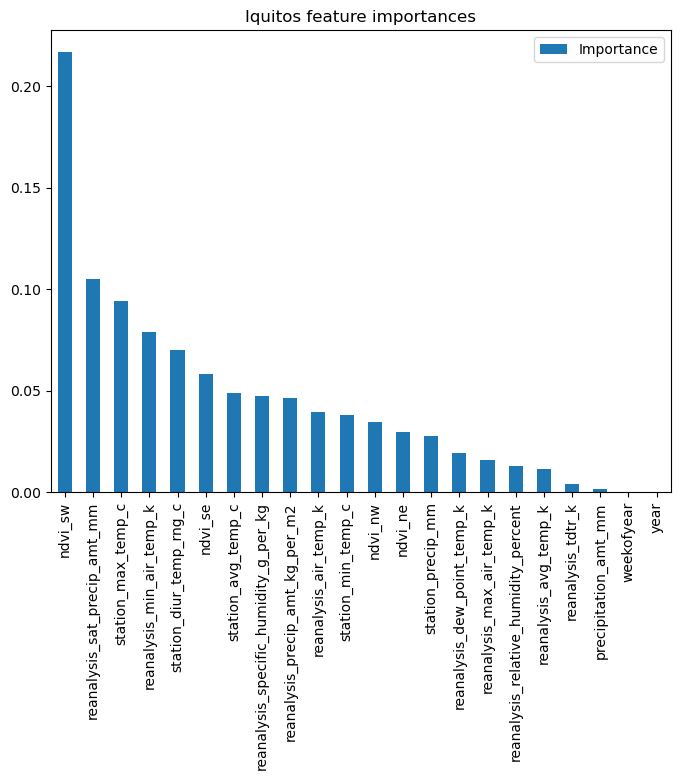

In [45]:
feat_imp = pd.DataFrame(regressor.feature_importances_, index = feat_sj.columns, columns = ['Importance'])

feat_imp.sort_values(by = 'Importance', ascending = False, inplace = True)
feat_imp.plot(kind='bar', figsize=(8,6))
plt.title('Iquitos feature importances')
plt.show()

In [46]:
# Iquitos - New modelling with correlated values and the 7 most important features

feat_new_iq = feat_iq[
    ["year", "weekofyear",'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k",'reanalysis_min_air_temp_k',
     'reanalysis_tdtr_k',"station_diur_temp_rng_c",'station_min_temp_c',"reanalysis_dew_point_temp_k",
     "reanalysis_relative_humidity_percent","reanalysis_specific_humidity_g_per_kg","station_max_temp_c",
     'reanalysis_precip_amt_kg_per_m2',"reanalysis_dew_point_temp_k", "precipitation_amt_mm"]]


X_train_new_iq, X_test_new_iq, y_train_iq, y_test_iq = train_test_split(feat_new_iq, target_iq, test_size = 0.2, random_state = 42)

In [47]:
col = ["year", "weekofyear",'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k",'reanalysis_min_air_temp_k',
     'reanalysis_tdtr_k',"station_diur_temp_rng_c",'station_min_temp_c',"reanalysis_dew_point_temp_k",
     "reanalysis_relative_humidity_percent","reanalysis_specific_humidity_g_per_kg","station_max_temp_c",
     'reanalysis_precip_amt_kg_per_m2',"reanalysis_dew_point_temp_k", "precipitation_amt_mm"]

In [48]:
X_train_new_iq = X_train_new_iq.drop(["year", "weekofyear"], axis = 1)


In [49]:
# Year and weekofyear columns storage

iq_year = X_test_new_iq[["year",'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k"]]
iq_weekofyear = X_test_new_iq[["weekofyear",'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k"]]
dfiq_yw = iq_year.merge(iq_weekofyear, left_on=['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k"],
                     right_on = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k"])

dfiq_yw.head()

,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,weekofyear
0,2005,0.373429,0.277483,0.374229,0.352271,299.515714,41
1,2002,0.269350,0.212157,0.188929,0.194943,297.764286,16
2,2000,0.312486,0.329986,0.380586,0.387271,297.320000,32
3,2003,0.364486,0.260986,0.316457,0.385157,296.948571,38
4,2002,0.212786,0.274550,0.198700,0.228457,296.407143,13


In [50]:
X_test_new_iq = X_test_new_iq.drop(["year", "weekofyear"], axis = 1)

In [51]:
X_train_new_iq = imputer.fit_transform(X_train_new_iq)
X_test_new_iq = imputer.transform(X_test_new_iq)

In [52]:
# Linear regression model
reglin.fit(X_train_new_iq, y_train_iq)

LinearRegression()

In [53]:
# Models comparison

regressor.fit(X_train_new_iq, y_train_iq)
pois.fit(X_train_new_iq, y_train_iq)

PoissonRegressor()

In [54]:
print("Train reg score :", reglin.score(X_train_new_iq, y_train_iq))
print("Test reg score :", reglin.score(X_test_new_iq, y_test_iq))

print("Train decision tree score :", regressor.score(X_train_new_iq, y_train_iq))
print("Test decision tree score :", regressor.score(X_test_new_iq, y_test_iq))

print("Train poisson score:", pois.score(X_train_new_iq, y_train_iq))
print("Test poisson score:", pois.score(X_test_new_iq, y_test_iq))

Train reg score : 0.09339346751354027
Test reg score : -0.013037489025481408
Train decision tree score : 1.0
Test decision tree score : -1.0028272009050583
Train poisson score: 0.12944242012297724
Test poisson score: -0.008078958368167966


In [55]:
# Metrics MAE, MSE and RMSE display
pred_reg = reglin.predict(X_test_new_iq)
pred_train_reg = reglin.predict (X_train_new_iq)

mae_reg = mean_absolute_error(y_test_iq, pred_reg)
mae_train_reg = mean_absolute_error(y_train_iq, pred_train_reg)

mse_reg = mean_squared_error(y_test_iq, pred_reg)
mse_train_reg = mean_squared_error(y_train_iq, pred_train_reg)

rmse_reg = mean_squared_error(y_test_iq, pred_reg, squared = False)
rmse_train_reg = mean_squared_error(y_train_iq, pred_train_reg, squared = False)


pred_regressor = regressor.predict(X_test_new_iq)
pred_train_regressor = regressor.predict (X_train_new_iq)

mae_regressor = mean_absolute_error(y_test_iq, pred_regressor)
mae_train_regressor = mean_absolute_error(y_train_iq, pred_train_regressor)

mse_regressor = mean_squared_error(y_test_iq, pred_regressor)
mse_train_regressor = mean_squared_error(y_train_iq, pred_train_regressor)

rmse_regressor = mean_squared_error(y_test_iq, pred_regressor, squared = False)
rmse_train_regressor = mean_squared_error(y_train_iq, pred_train_regressor, squared = False)

pred_pois = pois.predict(X_test_new_iq)
pred_train_pois = pois.predict (X_train_new_iq)

mae_pois = mean_absolute_error(y_test_iq, pred_pois)
mae_train_pois = mean_absolute_error(y_train_iq, pred_train_pois)

mse_pois = mean_squared_error(y_test_iq, pred_pois)
mse_train_pois = mean_squared_error(y_train_iq, pred_train_pois)

rmse_pois = mean_squared_error(y_test_iq, pred_pois, squared = False)
rmse_train_pois = mean_squared_error(y_train_iq, pred_train_pois, squared = False)

In [56]:
# Dataframe creation :

datax = {"MAE train" : [mae_train_reg,mae_train_regressor, mae_train_pois],
        "MAE test" : [mae_reg,mae_regressor, mae_pois],
        "MSE train" : [mse_train_reg, mse_train_regressor, mse_train_pois],
        "MSE test" : [mse_reg , mse_regressor, mse_pois],
        "RMSE train" : [rmse_train_reg,rmse_train_regressor,rmse_train_pois],
        "RMSE test" : [rmse_reg, rmse_regressor, rmse_pois]}

df = pd.DataFrame(datax, index = ["Linear Regression", "Decision Tree", "Poisson"])

df.head()

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test
Linear Regression,6.337507,6.517742,112.091759,84.610266,10.587340,9.198384
Decision Tree,0.000000,9.048077,0.000000,167.278846,0.000000,12.933632
Poisson,6.407608,6.609464,114.571212,86.397726,10.703794,9.295038


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   week_start_date                        416 non-null    object 
 4   ndvi_ne                                373 non-null    float64
 5   ndvi_nw                                405 non-null    float64
 6   ndvi_se                                415 non-null    float64
 7   ndvi_sw                                415 non-null    float64
 8   precipitation_amt_mm                   414 non-null    float64
 9   reanalysis_air_temp_k                  414 non-null    float64
 10  reanalysis_avg_temp_k                  414 non-null    float64
 11  reanal

In [97]:
# Results San Juan :
import random

test_sj =  test.loc[test['city'] == "sj"]

test_mod = test.drop(["city","year","weekofyear","week_start_date"], axis =1).sample(n=260, random_state=42)

train_mod = data_sj.drop(["city","year","weekofyear","total_cases"], axis =1).sample(n=260, random_state=42)

target_sj = data_sj["total_cases"].sample(n=260, random_state = 42)

from sklearn.impute import SimpleImputer
imputer_sj = SimpleImputer(missing_values=np.nan, strategy='mean')
train_mod = imputer_sj.fit_transform(train_mod)
test_mod = imputer_sj.transform(test_mod)


pois = linear_model.PoissonRegressor()

pois.fit(train_mod, target_sj)

pred_sj = pois.predict(test_mod)


test_sj["total_cases"] = pred_sj


predictions_sj = test_sj[["city", "year", "weekofyear", "total_cases"]]

predictions_sj["total_cases"] = predictions_sj["total_cases"].round()


predictions_sj.tail()

,city,year,weekofyear,total_cases
255,sj,2013,13,65.0
256,sj,2013,14,39.0
257,sj,2013,15,53.0
258,sj,2013,16,6.0
259,sj,2013,17,8.0


In [95]:
# Results Iquitos :
import random

test_iq =  test.loc[test['city'] == "iq"]

test_mod = test.drop(["city","year","weekofyear","week_start_date"], axis =1).sample(n=156, random_state=42)

train_mod = data_iq.drop(["city","year","weekofyear","total_cases"], axis =1).sample(n=156, random_state=42)

target_iq = data_iq["total_cases"].sample(n=156, random_state = 42)

from sklearn.impute import SimpleImputer
imputer_iq = SimpleImputer(missing_values=np.nan, strategy='mean')
train_mod = imputer_iq.fit_transform(train_mod)
test_mod = imputer_iq.transform(test_mod)


pois = linear_model.PoissonRegressor()

pois.fit(train_mod, target_iq)

pred_iq = pois.predict(test_mod)


test_iq["total_cases"] = pred_iq


predictions_iq = test_iq[["city", "year", "weekofyear", "total_cases"]]

predictions_iq["total_cases"] = predictions_iq["total_cases"].round()


predictions_iq.tail()

,city,year,weekofyear,total_cases
411,iq,2013,22,19.0
412,iq,2013,23,29.0
413,iq,2013,24,5.0
414,iq,2013,25,4.0
415,iq,2013,26,11.0


In [105]:
predictions = pd.concat([predictions_sj, predictions_iq])

predictions.total_cases = predictions.total_cases.astype('Int64')

display(predictions.head())

predictions.info()

,city,year,weekofyear,total_cases
0,sj,2008,18,23
1,sj,2008,19,4
2,sj,2008,20,5
3,sj,2008,21,20
4,sj,2008,22,64


<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         416 non-null    object
 1   year         416 non-null    int64 
 2   weekofyear   416 non-null    int64 
 3   total_cases  416 non-null    Int64 
dtypes: Int64(1), int64(2), object(1)
memory usage: 16.7+ KB


In [106]:
# Finale CSV file
predictions.to_csv("predictions.csv", index=False)

In [107]:
df = pd.read_csv("predictions.csv")
df.total_cases = df.total_cases.astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         416 non-null    object
 1   year         416 non-null    int64 
 2   weekofyear   416 non-null    int64 
 3   total_cases  416 non-null    Int64 
dtypes: Int64(1), int64(2), object(1)
memory usage: 13.5+ KB
